# Implementation of Multilayer Perceptrons

Multilayer perceptrons (MLPs) are not much more complex to implement than simple linear models. The key conceptual difference is that we now concatenate multiple layers.

## Concise Implementation

As you might expect, by relying on the high-level APIs, we can implement MLPs even more concisely.

### Model

As compared with our concise implementation of softmax regression implementation (Section 4.5), the only difference is that we add two fully connected layers where we previously added only one. The first is the hidden layer, the second is the output layer.

In [1]:
using Flux

model = Chain(Flux.flatten,Dense(28*28=>256),relu,Dense(256,10))

Chain(
  Flux.flatten,
  Dense(784 => 256),                    # 200_960 parameters
  NNlib.relu,
  Dense(256 => 10),                     # 2_570 parameters
)                   # Total: 4 arrays, 203_530 parameters, 795.289 KiB.

### Training

The training loop is exactly the same as when we implemented softmax regression. 

In [2]:
using MLUtils
using MLDatasets
using MLBase

# data prepare
ENV["DATADEPS_ALWAYS_ACCEPT"] = true
mnist_train,mnist_test = FashionMNIST(:train),FashionMNIST(:test)
features = mnist_train.features
labels = Flux.onehotbatch(mnist_train.targets,0:9)
train_loader = DataLoader((features,labels),batchsize=256)

mnist_accuracy(model, data::FashionMNIST) = correctrate(classify(model(data.features)).-1,data.targets)
loss(model,x,y) = Flux.logitcrossentropy(model(x),y)

# train
num_epochs = 10
results = map(1:num_epochs) do i
    for data in train_loader
        Flux.train!(loss,model,[data],Descent())
    end
    loss(model,features,labels),mnist_accuracy(model,mnist_train),mnist_accuracy(model, mnist_test)
end
train_loss, train_acc, test_acc = map(x->getindex.(results,x),1:3)

3-element Vector{Vector}:
 Float32[0.68876016, 0.56865656, 0.49360403, 0.44557437, 0.4166209, 0.3979724, 0.38223523, 0.3682386, 0.3582719, 0.34964567]
 [0.7618166666666667, 0.8034333333333333, 0.8294, 0.8449666666666666, 0.8544833333333334, 0.8608833333333333, 0.86575, 0.8708833333333333, 0.8740666666666667, 0.8769666666666667]
 [0.752, 0.791, 0.8153, 0.8304, 0.8402, 0.8449, 0.849, 0.8545, 0.8566, 0.8581]

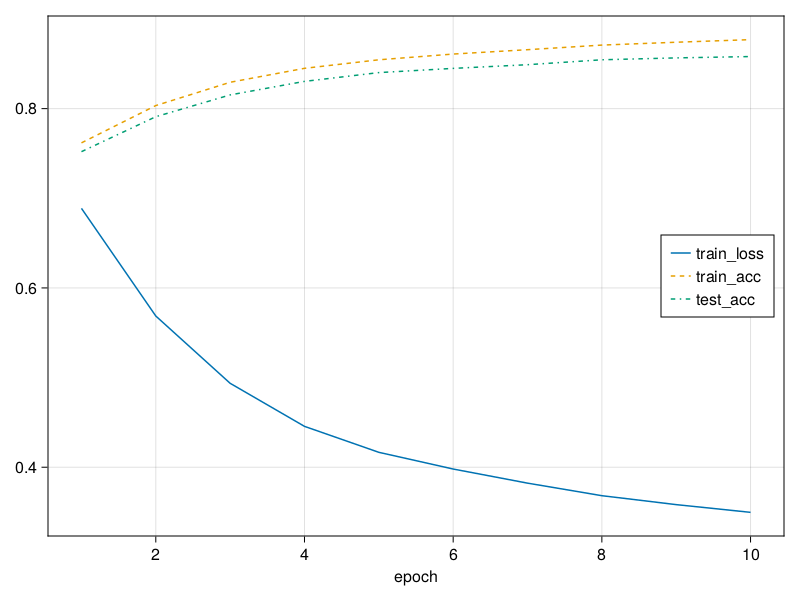

In [3]:
using CairoMakie

f,ax = lines(train_loss,label="train_loss";axis=(;xlabel="epoch"))
lines!(ax,train_acc,label="train_acc",linestyle=:dash)
lines!(ax,test_acc,label="test_acc",linestyle=:dashdot)
axislegend(position = :rc)
f